## Lab 7: Data access

So far in this course we have mainly been using data that has been downloaded **locally**. But it is becoming more and more common to access data directly from an online server. These platforms often have a **public API** that we can use to pull data inside our Python environment. 

The basic idea is we send a **request** (which may include query parameters and access credentials) to an endpoint. That endpoint will return a **response** code plus the data we asked for. For these kind of tasks, we have to carefully inspect the API **documentation** to understand what functions are available and what keyword arguments they require.

## Data access using APIs

We have already used one API (`cenpy`) very successfully in Lab 2 to download Census Bureau data: https://github.com/cenpy-devs/cenpy. Here is another one developed by USGS to retrieve water data: https://github.com/USGS-python/dataretrieval

On the GitHub `REAMDE.md` for this package it says we can install `dataretrieval` using `pip`.

In [9]:
# Install package for obtaining USGS streamflow data
!pip install -U dataretrieval

  Using cached dataretrieval-0.7-py3-none-any.whl (16 kB)


Now let's edit and run one of their example usages to see if it works. 

Note that the `dv` stands for daily values. This information is from https://github.com/USGS-python/dataretrieval. 

In [10]:
# Import the functions for downloading data from NWIS
import dataretrieval.nwis as nwis

# Specify the USGS site code
site = '03339000'

# Get instantaneous values (iv)
df = nwis.get_record(sites=site, service='dv', start='2020-10-01', end='2021-09-30')
df

,00010_Mean,00010_Mean_cd,site_no,00060_Mean,00060_Mean_cd,00065_Mean,00065_Mean_cd,00095_Mean,00095_Mean_cd,00300_Minimum,...,63680_ysi_Mean,63680_ysi_Mean_cd,91049_Mean,91049_Mean_cd,99133_Maximum,99133_Maximum_cd,99133_Minimum,99133_Minimum_cd,99133_Mean,99133_Mean_cd
datetime,,,,,,,,,,,,,,,,,,,,,
2020-10-01 00:00:00+00:00,14.9,A,03339000,75.7,A,2.04,A,672.0,A,8.9,...,3.7,A,1510.0,P,4.1,A,3.3,A,3.7,A
2020-10-02 00:00:00+00:00,14.5,A,03339000,66.0,A,1.99,A,678.0,A,9.2,...,3.6,A,1450.0,P,4.2,A,3.8,A,4.1,A
2020-10-03 00:00:00+00:00,14.2,A,03339000,60.2,A,1.96,A,678.0,A,9.4,...,3.2,A,1110.0,P,3.8,A,3.0,A,3.4,A
2020-10-04 00:00:00+00:00,14.4,A,03339000,68.8,A,2.01,A,705.0,A,9.1,...,3.3,A,1030.0,P,3.0,A,2.6,A,2.8,A
2020-10-05 00:00:00+00:00,13.4,A,03339000,66.8,A,1.99,A,718.0,A,9.6,...,3.1,A,1080.0,P,3.4,A,2.7,A,3.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-26 00:00:00+00:00,18.7,A,03339000,174.0,A,2.52,A,571.0,A,NaN,...,12.6,A,2080.0,P,2.5,A,2.1,A,2.2,A
2021-09-27 00:00:00+00:00,20.2,A,03339000,155.0,A,2.46,A,578.0,A,NaN,...,11.7,A,2050.0,P,2.6,A,2.2,A,2.4,A
2021-09-28 00:00:00+00:00,21.6,A,03339000,132.0,P,2.37,P,587.0,A,NaN,...,10.7,A,1600.0,P,2.4,A,2.1,A,2.2,A


<AxesSubplot:xlabel='datetime'>

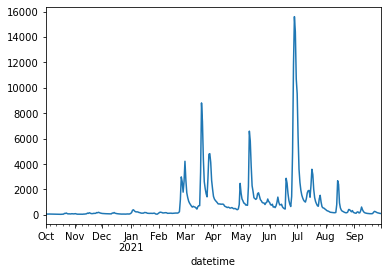

In [11]:
# Simple plot
df['00060_Mean'].plot()

---------------
## Question 1 (10 points)

Make a new `jupyter notebook` called `lab7_submission.ipynb` and complete the following tasks:


* Download daily values (i.e. `service='dv'`) for another station and time period of your choosing.



* Plot one column



* In a **markdown** cell below, describe what your plot shows



A map of station ID numbers can be found here: https://maps.waterdata.usgs.gov/mapper/index.html

A table of the parameter codes can be found here: https://help.waterdata.usgs.gov/parameter_cd?group_cd=PHY

---------------

## Accessing data from HTML tables

Sometimes there isn't an API to download our data. But since web pages are usually organized in a specfic way, we can still download data from them. A lot of data on Wikipedia, for example, is contained in HTML tables which have the following syntax.


* The table itself starts with the `<table>` tag and finishes with `</table>`


* Table rows start with the `<tr>` tag and finish with `</tr>`


* Table headers start with the `<th>` tag and finish with `</th>`


* Table data start with the `<td>` tag and finish with `</td>`


The table below, showing some of the biggest soccer clubs in the world, is an example of a simple HTML table. Double-click the cell to inspect the source code.

<table>
  <tr>
    <th>Team</th>
    <th>Manager</th>
    <th>Country</th>
  </tr>
  <tr>
    <td>Real Madrid</td>
    <td>Carlo Ancelotti</td>
    <td>Spain</td>
  </tr>
  <tr>
    <td>Bayern Munich</td>
    <td>Andrea Trinchieri</td>
    <td>Germany</td>
  </tr>
    <tr>
    <td>Hull City</td>
    <td>Shota Arveladze</td>
    <td>England</td>
  </tr>
    <tr>
    <td>Paris Saint-Germain</td>
    <td>Mauricio Pochettino</td>
    <td>France</td>
  </tr>
</table>

---------------
## Question 2 (10 points)

* Make an HTML table that contains the **site name**, **site number** and **mean daily discharge** between Oct 31, 2020 and Sep 30, 2021 (zero decimal places)** for **three** rivers in the US.

HINT: the discharge parameter is `00060_Mean`. If the data from your site does not contain this column, try another site.

--------------

Since all HTML tables have a common syntax, they can be easily opened as `pandas DataFrames`.

In [12]:
# Import packages
import numpy as np
import pandas as pd
import folium

In [13]:
# Read HTML table data
mountains = pd.read_html('https://en.wikipedia.org/wiki/List_of_mountain_peaks_of_Oregon')
mountains

[                                                   0
 0  Map this section's coordinates using: OpenStre...
 1                       Download coordinates as: KML,
     Rank                           Mountain peak        Mountain range  \
 0      1               Mount Hood[6][7][8][9][a]         Cascade Range   
 1      2      Mount Jefferson[10][11][12][13][b]         Cascade Range   
 2      3            South Sister[14][15][16][17]         Cascade Range   
 3      4         North Sister[18][19][20][21][c]         Cascade Range   
 4      5        Middle Sister[22][23][24][25][d]         Cascade Range   
 5      6        Sacajawea Peak[26][27][28][e][f]     Wallowa Mountains   
 6      7          Steens Mountain[29][30][31][g]       Steens Mountain   
 7      8        Aneroid Mountain[32][33][34][35]     Wallowa Mountains   
 8      9               Twin Peaks[36][37][38][h]     Wallowa Mountains   
 9     10            Red Mountain[39][40][41][42]     Wallowa Mountains   
 10    11  M

The output of this is a little messy because we grabbed all the tables on the webpage. 

In [14]:
# Print number of tables on webpage
len(mountains)

13

In [15]:
# We would like the table that contains the highest summits of Oregon which happens to be the second one
mountain_stats = mountains[1]

### Note: I could not figure out why the `Location` of the first row was a different format to the rest so I did a bit of wrangling to fix it.

In [16]:
# Some wrangling
mountain_stats['Location'] = mountain_stats['Location'].str.replace(mountain_stats['Location'].loc[0], "45°22′25″N 121°41′45″W\ufeff / \ufeff45.3735°N 121.6959°W", regex=True)

In [17]:
mountain_stats

,Rank,Mountain peak,Mountain range,Elevation,Prominence,Isolation,Location
0,1,Mount Hood[6][7][8][9][a],Cascade Range,3428.8 m,2349 m,92.2 km,45°22′25″N 121°41′45″W﻿ / ﻿45.3735°N 121.6959°W
1,2,Mount Jefferson[10][11][12][13][b],Cascade Range,3201 m,1767 m,77.5 km,44°40′27″N 121°47′59″W﻿ / ﻿44.6743°N 121.7996°W
2,3,South Sister[14][15][16][17],Cascade Range,3158.5 m,1705 m,63.4 km,44°06′13″N 121°46′09″W﻿ / ﻿44.1035°N 121.7693°W
3,4,North Sister[18][19][20][21][c],Cascade Range,3075 m,837 m,7 km,44°10′00″N 121°46′20″W﻿ / ﻿44.1666°N 121.7723°W
4,5,Middle Sister[22][23][24][25][d],Cascade Range,3064 m,382 m,1.8 km,44°08′54″N 121°47′02″W﻿ / ﻿44.1483°N 121.7840°W
5,6,Sacajawea Peak[26][27][28][e][f],Wallowa Mountains,3000 m,1949 m,202 km,45°14′42″N 117°17′34″W﻿ / ﻿45.2450°N 117.2929°W
6,7,Steens Mountain[29][30][31][g],Steens Mountain,2968 m,1336 m,201 km,42°38′11″N 118°34′36″W﻿ / ﻿42.6364°N 118.5767°W
7,8,Aneroid Mountain[32][33][34][35],Wallowa Mountains,2958.7 m,647 m,9.48 km,45°12′11″N 117°10′30″W﻿ / ﻿45.2030°N 117.1750°W
8,9,Twin Peaks[36][37][38][h],Wallowa Mountains,2950 m,610 m,7.79 km,45°18′17″N 117°20′43″W﻿ / ﻿45.3046°N 117.3452°W
9,10,Red Mountain[39][40][41][42],Wallowa Mountains,2913.8 m,610 m,11.84 km,45°03′52″N 117°14′46″W﻿ / ﻿45.0644°N 117.2460°W


In [18]:
mountain_stats.dtypes

Rank               int64
Mountain peak     object
Mountain range    object
Elevation         object
Prominence        object
Isolation         object
Location          object
dtype: object

### Convert coordinates to `float` 

As can be seen from above, our `Location` column is an `object` datatype which is not very useful. But web scraping is all about data wrangling. So we will convert it to a `float` so we can plot these mountains on a map.

In [19]:
# Have a look at the location object
mountain_stats['Location'].iloc[0]

'45°22′25″N 121°41′45″W\ufeff / \ufeff45.3735°N 121.6959°W'

In [20]:
# The latitude is string position 27 to 34
lat1 = mountain_stats['Location'].iloc[0][27:34]

# The longitude is string position 37 to 45
lon1 = mountain_stats['Location'].iloc[0][37:45]

Note that our longitude is **west** of the prime meridian, not **east** as is more standard.

In [21]:
# Convert to float and multiple by -1
float(mountain_stats['Location'].iloc[0][37:45]) * -1

-121.6959

In [22]:
# To get these data from every row, we can write a quick for loop
coords = []
for i in range(len(mountain_stats)):
    lat = float(mountain_stats['Location'].iloc[i][27:34])
    lon = float(mountain_stats['Location'].iloc[i][37:45]) * -1
    coords.append((lat, lon))
coords

[(45.3735, -121.6959),
 (44.6743, -121.7996),
 (44.1035, -121.7693),
 (44.1666, -121.7723),
 (44.1483, -121.784),
 (45.245, -117.2929),
 (42.6364, -118.5767),
 (45.203, -117.175),
 (45.3046, -117.3452),
 (45.0644, -117.246),
 (42.4445, -122.3156),
 (45.2223, -117.3968),
 (43.1528, -122.0665),
 (44.083, -121.6994),
 (44.8168, -118.1039),
 (43.9794, -121.6885),
 (44.3123, -118.7166),
 (42.9229, -122.0162),
 (43.5207, -122.1496),
 (42.0995, -118.6506),
 (42.0628, -120.2408),
 (42.3001, -120.1238),
 (43.1551, -122.22),
 (42.496, -120.8773),
 (42.3155, -122.0876),
 (42.9306, -121.3607),
 (44.7138, -118.5617),
 (42.5134, -122.1453),
 (44.2889, -118.4954),
 (42.4597, -119.7414),
 (43.6892, -121.2549)]

### Plot on a map

In [23]:
map = folium.Map(location=[44, -121], zoom_start=7)
for i in range(0, len(coords)):
    folium.Marker(coords[i]).add_to(map)
map

## Convert `Elevation` to float

It would also be useful to convert other columns to float so we can analyze the data. To do this we'll have to drop the `m` from the data. 

Remember when we index a string, a `:` used on the **right** side of the index will get everything **after** that particular index as an output. Alternatively, a `:` used on the **left** side of the index will get everything **before** that particular index as an output.

Also remember that we can pass **negative numbers** to index from the **end** of the string (instead of from the start).

In [24]:
# Get elevation value as a float
float(mountain_stats['Elevation'].iloc[0][:-2])

3428.8

In [25]:
# To get these data from every row, we can write another quick for loop
elevation = []
for i in range(len(mountain_stats)):
    elev = float(mountain_stats['Elevation'].iloc[i][:-2])
    elevation.append(elev)
elevation

[3428.8,
 3201.0,
 3158.5,
 3075.0,
 3064.0,
 3000.0,
 2968.0,
 2958.7,
 2950.0,
 2913.8,
 2895.0,
 2816.0,
 2799.4,
 2798.0,
 2777.0,
 2764.0,
 2756.1,
 2722.9,
 2666.4,
 2633.3,
 2575.8,
 2564.0,
 2553.3,
 2550.6,
 2503.83,
 2499.3,
 2482.0,
 2449.8,
 2450.0,
 2445.8,
 2435.0]

Now when we make our map, we can add elevation data as a pop-up (run the cell below and click the markers to test).

In [26]:
map = folium.Map(location=[44, -121], zoom_start=7)
for i in range(0, len(coords)):
    folium.Marker(coords[i], popup=elevation[i]).add_to(map)
map

---------------
## Question 3 (10 points)

* Make a new map of the tallest mountains in Oregon but include a popup that displays the `Isolation` data as a **float**.

--------------

## Extra credit/grad students 

* Add a popup that includes the name of the mountain as a `string` (without any square brackets).  

--------------


## Automated screen browsing

The previous task is a great example of web scraping. When data is nicely formatted in HTML tables, it is pretty easy to collect (although converting it into useful data can be a challenge).

However, sometimes our data is not contained in neat HTML tables. For example, the Wikipedia list of [**Ski areas and resorts in Oregon**](https://en.wikipedia.org/wiki/Category:Ski_areas_and_resorts_in_Oregon) is just a set of hyperlinks to other Wikipedia pages. To find the geographic coordinates of the ski resorts we will have to use some more advanced web scraping tools such as `selenium`.

In [27]:
# Install webdriver_manager: https://github.com/SergeyPirogov/webdriver_manager
!pip3 install webdriver_manager

  Using cached webdriver_manager-3.5.2-py2.py3-none-any.whl (17 kB)
  Using cached configparser-5.2.0-py3-none-any.whl (19 kB)
  Using cached crayons-0.4.0-py2.py3-none-any.whl (4.6 kB)
  Using cached colorama-0.4.4-py2.py3-none-any.whl (16 kB)


In [28]:
# Import packages
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

In [31]:
# Install Chrome webdriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Open a web browser at the following page
driver.get("https://en.wikipedia.org/wiki/Category:Ski_areas_and_resorts_in_Oregon")



====== WebDriver manager ======
Current google-chrome version is 97.0.4692
Get LATEST chromedriver version for 97.0.4692 google-chrome
Driver [/home/johnny/.wdm/drivers/chromedriver/linux64/97.0.4692.71/chromedriver] found in cache


Right-click on a blank part of the newly opened webpage and select **Inspect**. If we move our cursor slowly over the HTML code on the right side of the page, the corresponding part of the web page is highlighted. If we click the black triangles we can unpack **sections** (that have the `<div>` tag) of the HTML code. If we do this a couple of times, we eventually find a section called `id="mw-pages"`. In this section, there are more sections, with each ski resort being denoted by the `<li>` tag which stands for **link**. We can retrieve these links programmatically using the `.find_elements` method.

In [32]:
# Retrieve ski resort names
html_list = driver.find_element(By.ID, "mw-pages")
items = html_list.find_elements(By.TAG_NAME, "li")

The `.find_elements` method returns multiple `selenium objects`. We can retrieve just the `text` of these `objects` by looping over them. 

In [33]:
ski_resort_names = []
for item in items:
    text = item.text
    print(text)
    ski_resort_names.append(text)
driver.close()

Anthony Lakes (ski area)
Mount Ashland Ski Area
Cooper Spur ski area
Ferguson Ridge Ski Area
Hoodoo (ski area)
Mount Ashland Ski Area Expansion
Mount Bachelor ski area
Mount Hood Meadows
Mount Hood Skibowl
Snow Bunny
Spout Springs Ski Area
Summit Pass (Oregon)
Timberline Lodge ski area
Warner Canyon
Willamette Pass Resort


## Geocoding

Geocoding is the process of transforming an address (e.g. "1600 Amphitheatre Parkway, Mountain View, CA") into geographic coordinates (e.g. 37.423021, -122.083739). This is a hugely important part of mapping services like Google Maps and OpenStreetMap since it allows these services to place markers on a map, provide directions etc. There are many geocoding services but often they have a limit the number of free calls we can make. But if we're clever, we can geocode **unlimitedly** for **free** using Google Maps (https://www.google.com/maps) and automated web browsing. 

In [35]:
# Define test URL
url = 'https://www.google.com/maps/place/Hoodoo+Ski+Area+Oregon/'

# Install Chrome webdriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Open URL
driver.get(url)



====== WebDriver manager ======
Current google-chrome version is 97.0.4692
Get LATEST chromedriver version for 97.0.4692 google-chrome
Driver [/home/johnny/.wdm/drivers/chromedriver/linux64/97.0.4692.71/chromedriver] found in cache


We should now have a new web browser with some text in the search bar. We automatically click the **search** button with the following code.

In [36]:
# Click search
element = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.ID, "searchbox-searchbutton")))
element.click()

The ` WebDriverWait(driver, 10).until(EC.element_to_be_clickable` basically tells the web driver to wait for the page to load so we can be certain that the search button is available to be clicked. 

The new URL looks something like: https://www.google.com/maps/place/Hoodoo+Ski+Area/@44.4086477,-121.8735991,17z/data=!3m1!4b1!4m5!3m4!1s0x54bf374c3f8e7d9d:0x28cc775b14baa46b!8m2!3d44.4086439!4d-121.8714158) 

We can see that the **latitude** and **longitude** of the ski resort is defined immediately after the `@` sign. We can take advantage of this syntax to retrieve the coordinates some more string position indexing. 

In [37]:
# Retrieve the URL
link = driver.current_url

# We can find the first occurrence of a character by using the "find" method
link.find('@')

50

There is a really useful method call `rsplit()` which **splits** a string based on a **specific character** into a **list**, starting from the **right**. We can use this to get our coordinates in a really robust way. Let's have a look at how `.rsplit` works.

In [38]:
split1 = link.rsplit('@', 1)
split1

['https://www.google.com/maps/place/Hoodoo+Ski+Area/',
 '44.4086477,-121.8735991,17z/data=!3m1!4b1!4m5!3m4!1s0x54bf374c3f8e7d9d:0x28cc775b14baa46b!8m2!3d44.4086439!4d-121.8714158']

In [39]:
split2 = split1[1].rsplit(',', 1)
split2

['44.4086477,-121.8735991',
 '17z/data=!3m1!4b1!4m5!3m4!1s0x54bf374c3f8e7d9d:0x28cc775b14baa46b!8m2!3d44.4086439!4d-121.8714158']

In [40]:
split3 = split2[0].rsplit(',', 1)
split3

['44.4086477', '-121.8735991']

In [41]:
# Here's the "one-liner"
lat, lon = link.rsplit('@', 1)[1].rsplit(',', 1)[0].rsplit(',', 1)

In [42]:
lat, lon

('44.4086477', '-121.8735991')

In [43]:
driver.close()

OK let's put this into a for loop and watch the magic happen.

In [44]:
ski_resort_coords = []
# Loop through every ski resort to find it's coordinates
for resort in ski_resort_names:
       
    # Define URL to search in Google Maps and add 'Oregon' in for good measure
    url = 'https://www.google.com/maps/place/' + resort + ' Oregon/'
    
    # Import web driver and search for ski resorts
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    driver.get(url)
      
    # Click search
    element = WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.ID, "searchbox-searchbutton")))
    element.click()
    
    # Make the web driver wait until the URL updates (i.e. contains the @ sign we're looking for)
    WebDriverWait(driver, 20).until(EC.url_contains("@"))
    
    # Retrieve the URL
    link = driver.current_url
    
    # Split string
    lat, lon = link.rsplit('@', 1)[1].rsplit(',', 1)[0].rsplit(',', 1)
    
    # Append to list
    ski_resort_coords.append((lat, lon))
    
    # Close driver
    driver.close()



====== WebDriver manager ======
Current google-chrome version is 97.0.4692
Get LATEST chromedriver version for 97.0.4692 google-chrome
Driver [/home/johnny/.wdm/drivers/chromedriver/linux64/97.0.4692.71/chromedriver] found in cache


====== WebDriver manager ======
Current google-chrome version is 97.0.4692
Get LATEST chromedriver version for 97.0.4692 google-chrome
Driver [/home/johnny/.wdm/drivers/chromedriver/linux64/97.0.4692.71/chromedriver] found in cache


====== WebDriver manager ======
Current google-chrome version is 97.0.4692
Get LATEST chromedriver version for 97.0.4692 google-chrome
Driver [/home/johnny/.wdm/drivers/chromedriver/linux64/97.0.4692.71/chromedriver] found in cache


====== WebDriver manager ======
Current google-chrome version is 97.0.4692
Get LATEST chromedriver version for 97.0.4692 google-chrome
Driver [/home/johnny/.wdm/drivers/chromedriver/linux64/97.0.4692.71/chromedriver] found in cache


====== WebDriver manager ======
Current google-chrome version 

In [46]:
ski_resort_coords

[('44.9629273', '-118.2357075'),
 ('42.081689', '-122.7069373'),
 ('45.4188609', '-121.6064311'),
 ('45.2816889', '-117.1148251'),
 ('44.4086477', '-121.8735991'),
 ('42.081689', '-122.7069373'),
 ('44.0028975', '-121.6812547'),
 ('45.331759', '-121.6673681'),
 ('45.2943906', '-121.80705'),
 ('45.2871456', '-121.7312248'),
 ('45.7552462', '-118.0536043'),
 ('43.9688848', '-125.7230331'),
 ('45.3233604', '-121.7891084'),
 ('42.237378', '-120.2968217'),
 ('43.6000579', '-122.0387233')]

In [47]:
map = folium.Map(location=[44, -121], zoom_start=7)
for i in range(0, len(ski_resort_coords)):
    folium.Marker(ski_resort_coords[i], popup=ski_resort_names[i]).add_to(map)
map

Something went wrong with *Summit Pass* because there are multiple returns but otherwise map is pretty accurate.

---------------
## Question 4 (10 points)

* Write a script to automatically derive the geographic coordinates for the following addresses:

    * 1844 SW Morrison St, Portland, OR 97205
    
    * 800 Occidental Ave S, Seattle, WA 98134
    
    * 1001 Stadium Dr, Inglewood, CA 90301
    
    * 2700 Martin Luther King Jr Blvd, Eugene, OR 97401
    

You can **either** find each one individually **or** make a list of the addresses and use a for loop. 


* Plot the coordinates of these addresses on an interactive map using `folium` 



--------------


## Which ski resorts received the most snowfall?

We will now compute snowfall statistics for each ski resort by applying some of the techniques we covered in Week 4. Download the `era_monthly_snowfall_2020.nc` from `lab7` folder on Dropbox. The link can be found on Slack or on Canvas). This dataset contains gridded **monthly** snowfall for 2020 in Oregon.

In [48]:
# Import package
import xarray as xr

# Define filepath
fp = '/home/johnny/Dropbox (University of Oregon)/Teaching/geospatial-data-science/data/lab7/'

# Read data
xds = xr.open_dataset(fp + '/era_monthly_snowfall_2020.nc', decode_coords='all')

In [49]:
xds

<xarray.Dataset>
Dimensions:    (longitude: 49, latitude: 25, time: 12)
Coordinates:
  * longitude  (longitude) float32 -128.0 -127.8 -127.5 ... -116.5 -116.2 -116.0
  * latitude   (latitude) float32 47.0 46.75 46.5 46.25 ... 41.5 41.25 41.0
  * time       (time) datetime64[ns] 2020-01-01 2020-02-01 ... 2020-12-01
Data variables:
    sf         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-01-30 21:04:05 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

---------------
## Question 5 (10 points)

* Which ski resort received **more** snowfall in 2020, Mount Ashland, Willammette Pass or Hoodoo? 

--------------

## Extra credit/grad students

Download `era_monthly_snowfall_1979_2020.nc` from the lab7 folder on Dropbox. 

* Rank the ski resorts by:

    * Average snowfall in **November**
    
    * Average snowfall in **Spring** (i.e. March, April, and May)
    
    * **Interannual variability** in snowfall 